# generate random CSV of arbitrary size

In [1]:
!pip install faker

  Using cached https://files.pythonhosted.org/packages/d9/eb/6d13451769976f79c9043db562da22302a2c3d96e5d6427e8517fec9d2e5/Faker-0.9.2-py2.py3-none-any.whl
  Using cached https://files.pythonhosted.org/packages/79/42/d717cc2b4520fb09e45b344b1b0b4e81aa672001dd128c180fabc655c341/text_unidecode-1.2-py2.py3-none-any.whl
You are using pip version 9.0.3, however version 18.1 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


https://stackoverflow.com/questions/31468727/how-to-create-1-gb-csv-file-with-random-data-using-python

In [2]:
import csv
import random
from faker import Faker
from datetime import datetime

In [3]:
libfake=Faker('en_GB')

remove any existing fake data previously generated

In [4]:
!rm out.csv

create a CSV filled with random text entries

In [5]:
def create_csv(csv_name,numer_of_lines):
    with open(csv_name,"w") as fcsv:
        w=csv.writer(fcsv)
        w.writerow(('id','name','email','phone','college','company'))
        for indx in range(numer_of_lines-1):
            w.writerow((indx+1,
                        libfake.name(),
                        libfake.ascii_safe_email(),
                        libfake.phone_number(),
                        random.choice(['psg','sona','miamf','foasmdg']),
                        random.choice(['CTS','INFY','HTC'])))

generate a CSV with 100 lines of fake data

In [6]:
create_csv("out.csv",100)

look at how big the file is on disk in bytes using the linux command "ls"

In [7]:
!ls -l out.csv

-rw-r--r-- 1 jovyan users 6760 Oct 31 01:09 out.csv


alternatively, we can use Python to determine the file size on disk

In [8]:
import os
size_in_bytes=os.path.getsize('out.csv')
size_in_bytes

6760

use "cat" to write the output from file, "|" to redirect that output, and "wc" to count the number of lines

In [9]:
!cat out.csv | wc -l

100


inspect the top 5 lines of the CSV using the linux command "head"

In [10]:
!head -n 5 out.csv

id,name,email,phone,college,company
1,Adam Chambers-Davies,rosiewatts@example.net,0121 4960844,psg,INFY
2,Tony Evans,eharrison@example.org,+44(0)1154960277,sona,INFY
3,Jeffrey Khan,bruceshirley@example.com,(0808) 157 0072,miamf,CTS
4,Rosemary Preston,fgiles@example.net,0118 496 0766,foasmdg,HTC


Use pandas to load the CSV from disk

In [11]:
import pandas
pandas.__version__

'0.23.4'

In order to measure the performance scaling, I'll need to time the operations

In [12]:
import time

As an example of how to time the loading of data, 

In [13]:
start = time.time() # Return the time in seconds since the epoch as a floating point number
df =pandas.read_csv('out.csv')
end = time.time()
execution_time=end - start
print(execution_time)

0.10126519203186035


For comparison with file size on disk, I'll use the "sys" module to measure how big the data is in memory once loaded to Python

In [14]:
import sys

loop over different CSV line counts and measure various aspects of the process

In [16]:
# I'm going to record measurements in these dictionaries
# these values are what get plotted
scaling_test_start=time.time()
line_count_vs_file_size={}
file_size_vs_load_time={}
file_size_vs_df_size={}
line_count_vs_load_time={}
print('csv line count, elapsed time [seconds]')
for csv_line_count in [100,1000,10000,50000,100000,500000]:
    loop_start_time=time.time()
    csv_start=time.time()
    # call the function that generates a random CSV
    create_csv("out.csv",csv_line_count)
    # in order to make sure the memory buffers are flushed, I'll generate a different CSV
    create_csv("another.csv",2000)
    # how long did it take to create the CSV?
    print('csv creation time: ',time.time()-csv_start)
    # record the number of lines in CSV vs the size on disk
    line_count_vs_file_size[csv_line_count]=os.path.getsize('out.csv')
    load_start = time.time() 
    df =pandas.read_csv('out.csv')
    load_time=time.time() - load_start
    file_size_vs_load_time[os.path.getsize('out.csv')]=load_time
    file_size_vs_df_size[os.path.getsize('out.csv')]=sys.getsizeof(df)  # in bytes
    line_count_vs_load_time[csv_line_count]=load_time
    print('pandas load time: ',line_count_vs_load_time[csv_line_count])
    #all_reslts.append(this_dict)
    print(csv_line_count,'; elapsed:',round(time.time()-loop_start_time,2),'seconds')

print('total run time:',time.time()-scaling_test_start,'seconds')

csv line count, elapsed time [seconds]
csv creation time:  0.9946866035461426
pandas load time:  0.005336284637451172
100 ; elapsed: 1.003284215927124
csv creation time:  1.4456596374511719
pandas load time:  0.007540225982666016
1000 ; elapsed: 1.4585881233215332
csv creation time:  5.477174758911133
pandas load time:  0.035140037536621094
10000 ; elapsed: 5.522902250289917
csv creation time:  23.920584678649902
pandas load time:  0.16901040077209473
50000 ; elapsed: 24.132712841033936
csv creation time:  46.689337968826294
pandas load time:  0.3334693908691406
100000 ; elapsed: 47.09806180000305
csv creation time:  238.90860962867737
pandas load time:  1.7705659866333008
500000 ; elapsed: 241.0396785736084


In [17]:
import matplotlib.pyplot as plt

As expected, the file size versus number of lines are linear

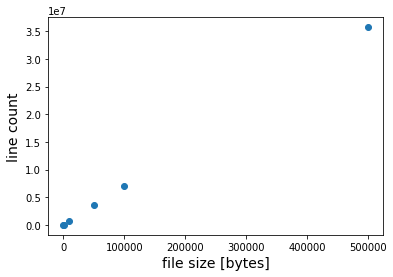

In [18]:
y = line_count_vs_file_size.keys()
x = line_count_vs_file_size.values()
_=plt.scatter(x,y)
_=plt.ylabel('file size [bytes]',fontsize=14)
_=plt.xlabel('line count',fontsize=14)

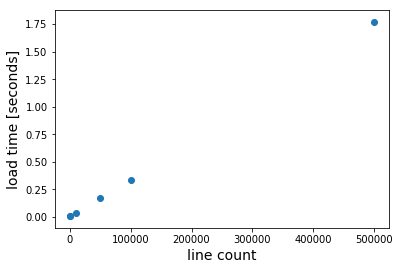

In [19]:
x = line_count_vs_load_time.keys()
y = line_count_vs_load_time.values()
_=plt.scatter(x,y)
_=plt.xlabel('line count',fontsize=14)
_=plt.ylabel('load time [seconds]',fontsize=14)

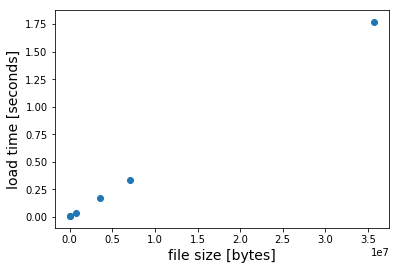

In [22]:
x = file_size_vs_load_time.keys()
y = file_size_vs_load_time.values()
_=plt.scatter(x,y)
_=plt.xlabel('file size [bytes]',fontsize=14)#, rotation='vertical')
_=plt.ylabel('load time [seconds]',fontsize=14)

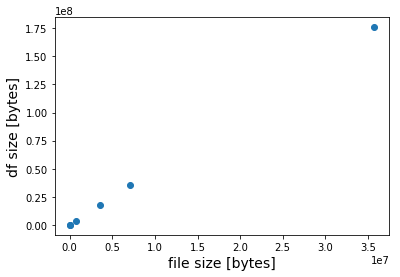

In [21]:
x = file_size_vs_df_size.keys()
y = file_size_vs_df_size.values()
_=plt.scatter(x,y)
_=plt.xlabel('file size [bytes]',fontsize=14)
_=plt.ylabel('df size [bytes]',fontsize=14)

In [23]:
!ls -hal

total 38M
drwxr-xr-x 12 jovyan  1000 4.0K Oct 31 01:17  .
drwxr-xr-x  1 root   root  4.0K Jul 20 19:33  ..
-rw-r--r--  1 jovyan users  555 Oct 29 11:33  algorithm_scaling.ipynb
-rw-r--r--  1 jovyan users 135K Oct 31 01:17  another.csv
-rw-r--r--  1 jovyan users  24K Oct 31 00:48  Bonferronis_principle.ipynb
-rw-r--r--  1 jovyan  1000 279K Oct 28 00:11 'burstiness of my Chrome history.ipynb'
drwxr-xr-x  4 jovyan users 4.0K Oct 28 22:38  .cache
drwxr-xr-x  4 jovyan users 4.0K Oct 29 11:28  .config
-rw-r--r--  1 jovyan users 6.9K Oct 29 11:29  dask.ipynb
drwxr-xr-x  2 jovyan users 4.0K Oct 29 11:39  dask-worker-space
-rw-r--r--  1 jovyan  1000 3.0M Oct 27 22:00  History
drwxr-xr-x  4 jovyan  1000 4.0K Oct 31 01:25  homework
-rw-r--r--  1 jovyan users  565 Oct 29 03:13  how_to_overwhelm_jupyter_compute.ipynb
-rw-r--r--  1 jovyan users  57K Oct 31 01:17  how_to_overwhelm_jupyter_data_loading.ipynb
drwxr-xr-x  2 jovyan users 4.0K Oct 30 23:01  .ipynb_checkpoints
drwxr-xr-x  5 jovyan users 4.